In [48]:
import pandas as pd
import numpy as np
import seaborn as sn
import pandas_profiling

In [49]:
data=pd.read_csv("C:/Users/Dell/Desktop/train_LZdllcl.csv")


In [50]:
data["education"]=data["education"].replace(np.NaN,"Bachelor's")
data["previous_year_rating"]=data["previous_year_rating"].replace(np.NaN,3.0)
data["previous_year_rating"].value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [51]:
def handle_non_numerical_data(data):
    columns = data.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if data[column].dtype != np.int64 and data[column].dtype != np.float64:
            column_contents = data[column].values.tolist()
            unique_elements = set(column_contents)
            x = 1
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            data[column] = list(map(convert_to_int, data[column]))

    return data

In [52]:
data=handle_non_numerical_data(data)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data.drop("is_promoted",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
scaler_feature=scaler.transform(data.drop("is_promoted",axis=1))
data_f=pd.DataFrame(scaler_feature,columns=data.columns[:-1])

In [55]:
pandas_profiling.ProfileReport(data)

Number of variables,14
Number of observations,54808
Total Missing (%),0.0%
Total size in memory,5.9 MiB
Average record size in memory,112.0 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [57]:
data_f.corr()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,1.000000,-0.003250,-0.005199,-0.000573,0.001542,-0.005960,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586
department,-0.003250,1.000000,-0.051319,-0.028848,0.037165,0.001157,-0.003053,-0.002806,0.114176,-0.016528,0.089372,0.001748,0.546471
region,-0.005199,-0.051319,1.000000,-0.007374,0.027975,0.000070,-0.034285,0.024348,0.013753,0.018167,-0.008521,-0.000485,-0.034289
education,-0.000573,-0.028848,-0.007374,1.000000,-0.035418,-0.001177,0.028699,-0.244200,-0.023985,-0.168225,-0.015525,0.003006,-0.034936
gender,0.001542,0.037165,0.027975,-0.035418,1.000000,0.006567,-0.084501,0.016293,0.024024,0.019675,0.037400,-0.002381,0.024494
recruitment_channel,-0.005960,0.001157,0.000070,-0.001177,0.006567,1.000000,0.010405,0.011400,-0.005731,0.002887,0.000297,0.005510,0.002416
no_of_trainings,-0.005121,-0.003053,-0.034285,0.028699,-0.084501,0.010405,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517
age,0.000437,-0.002806,0.024348,-0.244200,0.016293,0.011400,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380
previous_year_rating,0.004209,0.114176,0.013753,-0.023985,0.024024,-0.005731,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926
length_of_service,0.001274,-0.016528,0.018167,-0.168225,0.019675,0.002887,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122


In [58]:
data_f.drop(["employee_id","KPIs_met >80%","awards_won?","recruitment_channel","gender","age","length_of_service"],inplace=True,axis=1)

In [59]:
X=data_f[['department', 'region', 'education',
       'no_of_trainings', 'previous_year_rating',
       'avg_training_score']]


In [60]:
Y=data["is_promoted"]

In [61]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
linear=KNeighborsClassifier(n_neighbors=7)

In [64]:
linear.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [65]:
prediction=linear.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9331022319528066

FINDING THE BEST N_NEIGBHOR VALUE 

In [67]:
l=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi=knn.predict(X_test)
    l.append(np.mean(y_test !=predi))

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

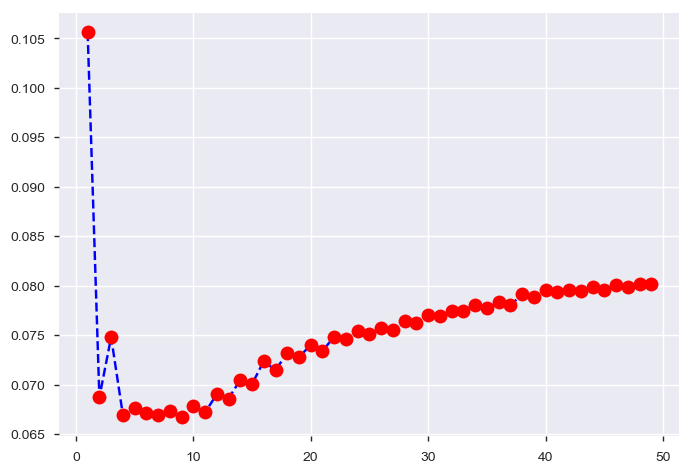

In [69]:
plt.plot(range(1,50),l,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)